### 1. Introduction
We aim to accomplist the following for this study:

1.1. Identify and visualize which factors contribute to customer churn:

1.2. Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

### 2. Data set review and preparation
In this section we will seek to explore the structure of our data:

1.2. To understand the input space the data set

2.2. And to prepare the sets for exploratory and prediction tasks as described in section 1

In [57]:
## import required libraries
# for data wrangling     
import numpy as np 
import pandas as pd 

# for visualization 
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt1
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [42]:
df = pd.read_csv('Churn_Modelling.csv')
# preview the dataset 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# view the dimension of the dataset
df.shape

(10000, 14)

The dataset has 1000 rows with 14 attributes. I will review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling.

In [44]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
# Data overview
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- There are 2037 Customer Exited and 7963 not
- There are 5151 Customer IsActiveMember and 4849 not
- There are 7055 Customer HasCrCard and 2945 not

- Mean Age: is approximately 38 years old and Minimum: 18 years old and Maximum: 92 years old.

- Mean balance is 76485. However, the Standard Deviation (62397) is a very high number so we can understand through this that the balance is heavily distributed across the dataset.
- Mean Estimated Salary 100090 and Minimum: 11 and Maximum: 199992 Note: There are some insights we can get from the descriptive dataset as well since most of our descriptive dataset is not found in 'numeric' columns but in 'categorical' columns..

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [45]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

I will remove these first three columns because they are not important and because the first 2 attributes as the are specific to a customer. 

There are so many similar Surnames. Maybe this means that each customer has more than one CustomerId, or that of these 10,000 people, most of them are families. Anyway it is borderline with the surname as this would result to profiling so we exclude this as well.

In [48]:
# Drop the columns as explained above
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [49]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.shape

(10000, 11)

Customer churn is the percentage of customers who stopped purchasing your business's products or services during a certain period of time

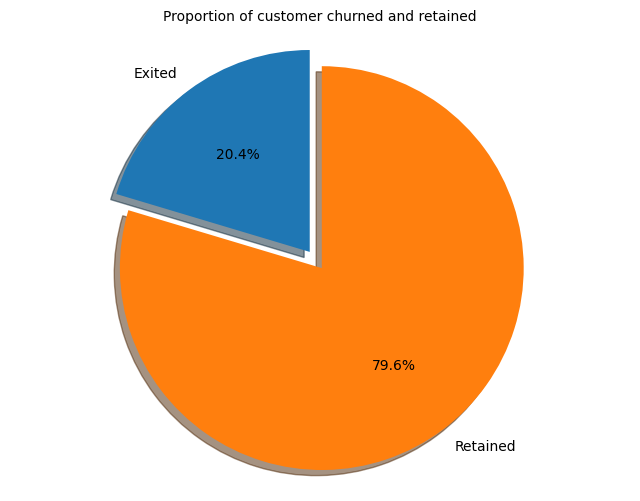

In [51]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retained', size=10)
plt.show()

So about 20% of customers have churned. So the baseline model could be to predict that 20% of customers will churn. Given 20% is a small number, we need to ensure that the model does predict with great accuracy this 20% as it is of interest to the bank to idetify and keep this bunch as opposed to accurately predicting the customers that are retained. 

<Axes: xlabel='IsActiveMember', ylabel='count'>

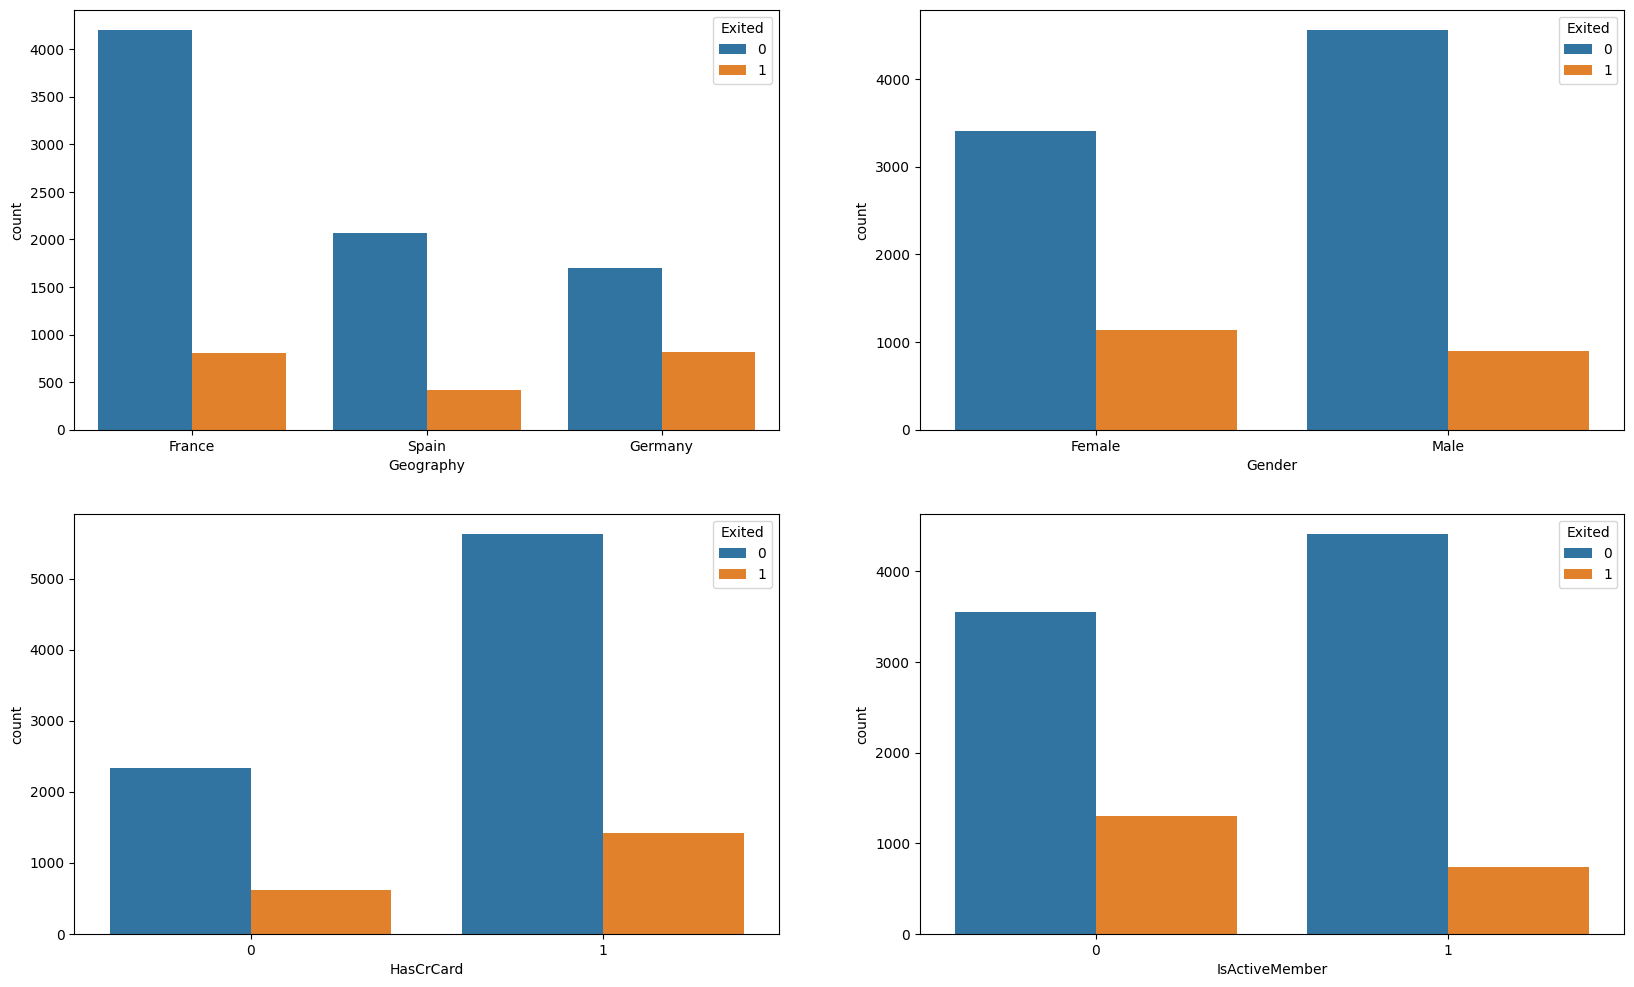

In [52]:
# First review the 'Status' relation with categorical variables 
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])


From 'Geography', we can see German are more likely to churn than Spanish and Franch, which is consistent to the positive correlation between Geography_Germany and Exited. From 'Gender', we can see more Female churn than Male, also consistent to the positive correlation between 'Gender_Female' and 'Exited'. 'HasCrCard' has no obvious pattern. From 'IsActiveMember', we can see non-active customers are more likely to churn, whereas active customers are less likely to churn. In general, our observation is consistent with our correlation plot above.

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients. 
- The proportion of female customers churning is also greater than that of male customers. 
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence. 
- Unsurprisingly the inactive members have a greater churn. Worrying is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn. 

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

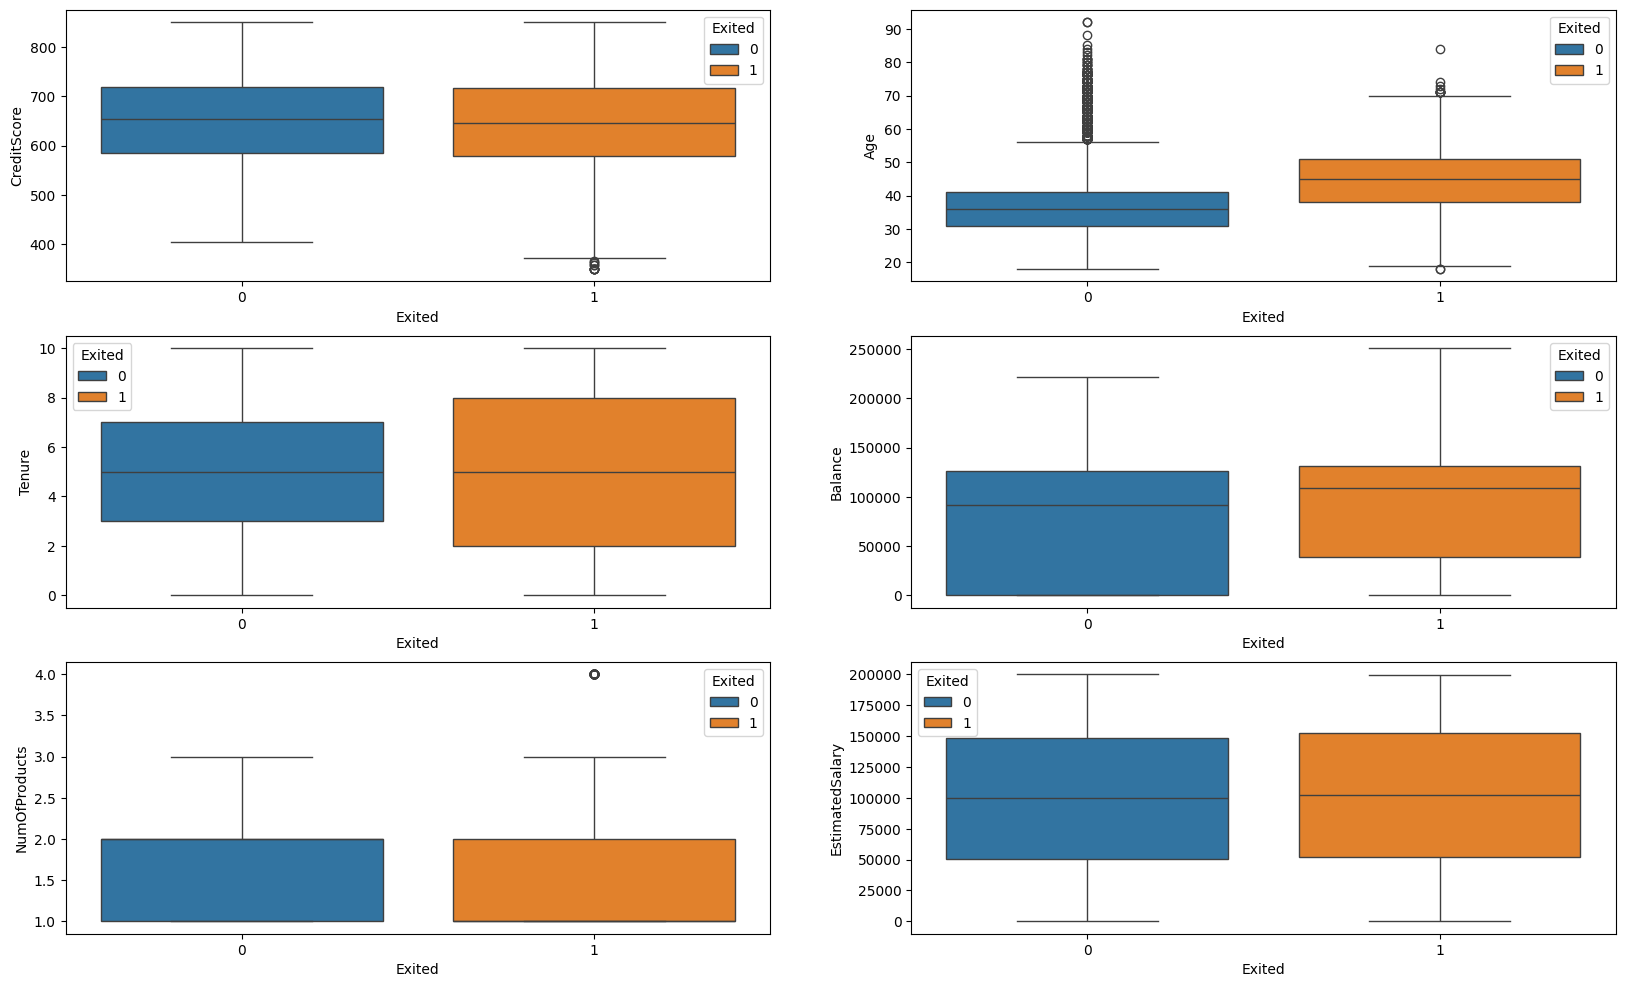

In [53]:
# Relations based on the continuos data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.
- With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- Neither the product nor the salary has a significant effect on the likelihood to churn.
- Most of the bank customers would between age 20 to age 55, there would still be some people older than 55 years old having bank accounts. Similarly, it is reasonable that we have some people with low 'CreditScore' and some people having many bank products 'NumOfProducts'. So I do not want to remove the outliers.
- 'Age' has many outliers. Let's check the distribution of 'Age' for churned and non-churned people.

##### Correlation between numerical variables and 'Exited'

In [54]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
temp = num_cols.copy()
temp.append('Exited')

<Axes: >

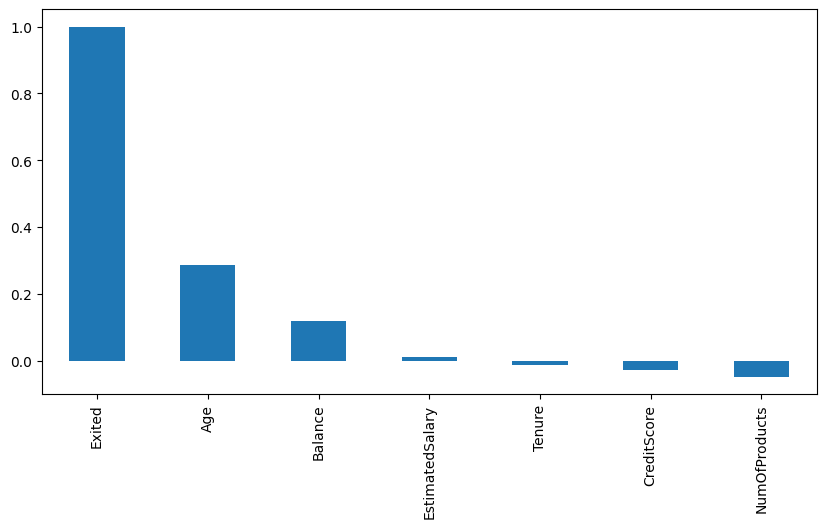

In [55]:
corr_df = df[temp]
corr_df = pd.get_dummies(corr_df)
plt.subplots(figsize=(10, 5))
corr_df.corr()['Exited'].sort_values(ascending = False).plot(kind = 'bar')

'Age' and 'Balance' are positively related to 'Exited', whereas the other features show little correlation.

#### Age distribution

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5436\3041703939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='green',
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5436\3041703939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='green',
C:\Users\MSI PC\AppDat

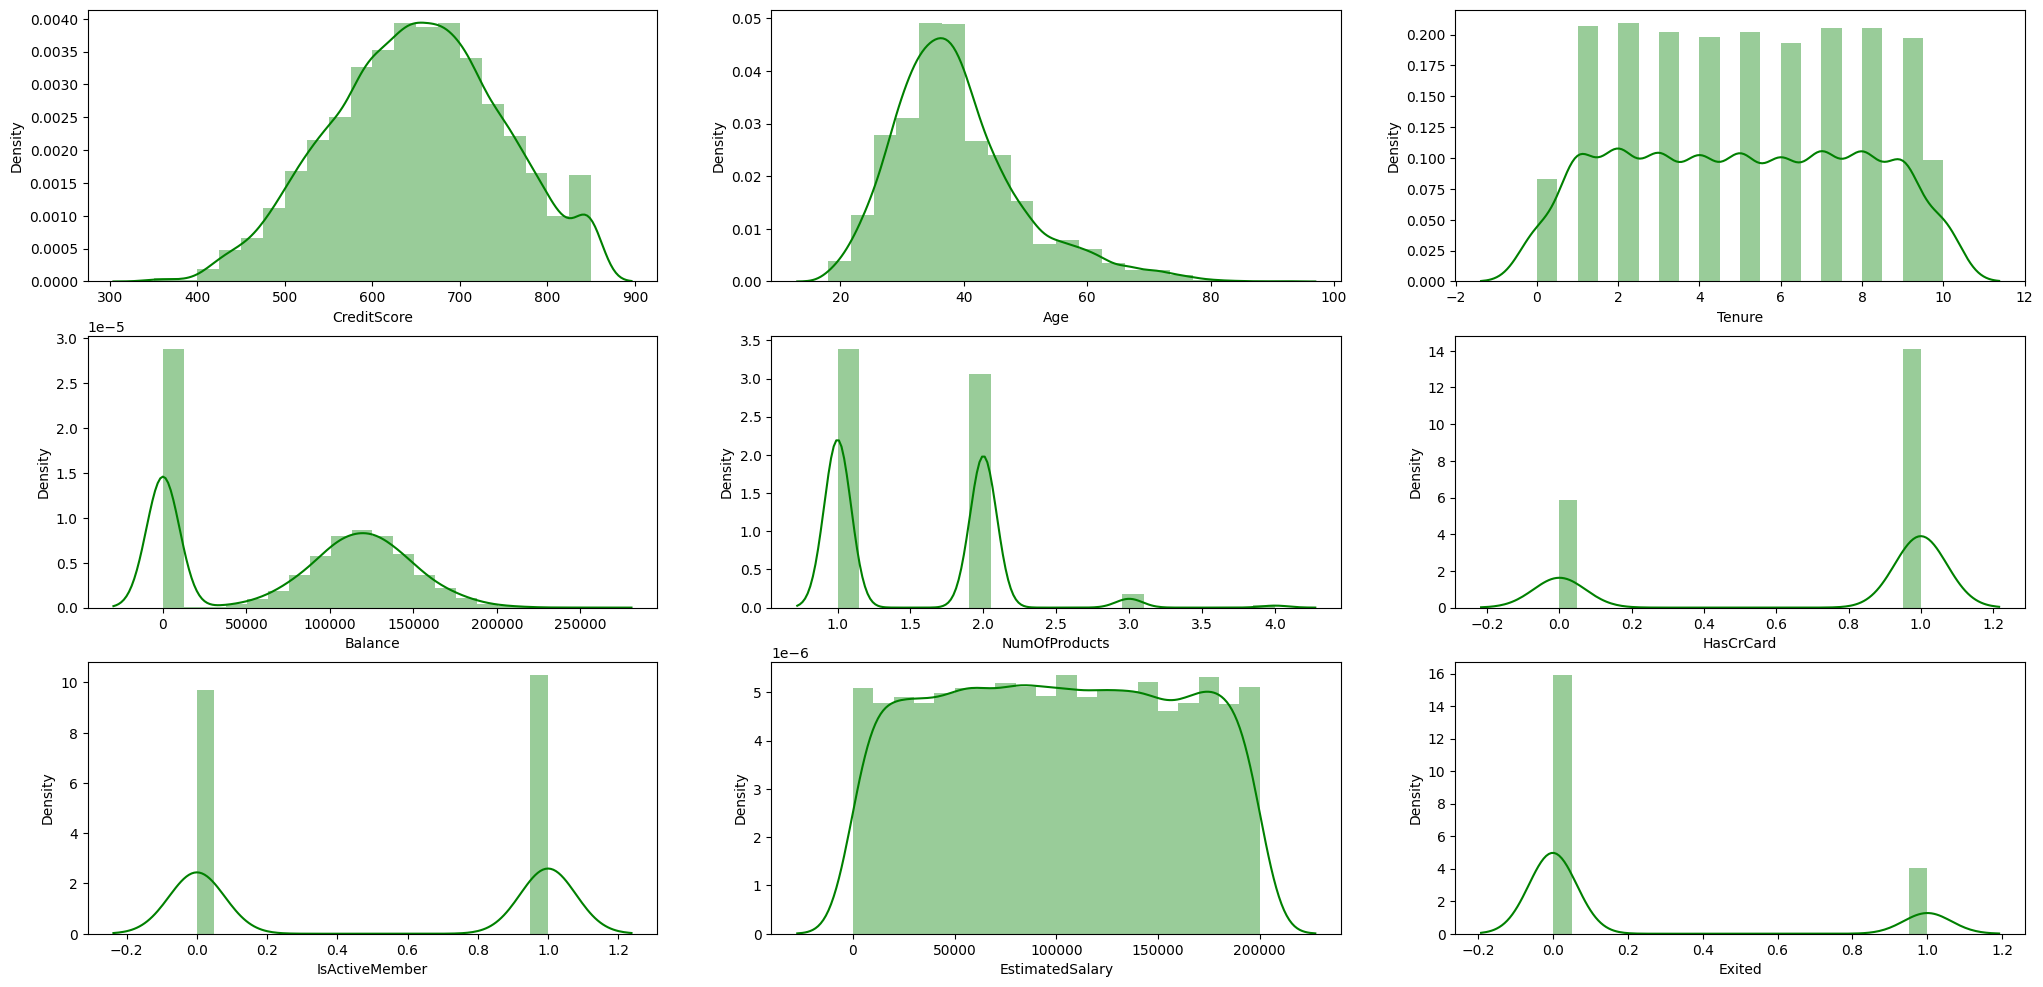

In [67]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
_,ax1 = plt.subplots(3,3, figsize=[25,12])
cur_row = 0
cur_col = 0
for col in cols:
    sns.distplot(df[col], color='green',
                 hist=True, kde=True, bins=20,
                 ax=ax1[cur_row][cur_col])
    cur_col += 1
    if cur_col == 3:
        cur_row += 1
        cur_col = 0

Customers have large, but there is a slice of the balance that there is a high percentage of people who have a balance of less than 100,000, for people who have a balance of more than 100,000, I think that is why we noticed in the statistical analysis above that the standard deviation in the balance is high..And that a slice of them has 'Credit Score' almost between 580 and 780.

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5436\1140475051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Exited']==0]['Age'],
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_5436\1140475051.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Exited']==1]['Age'],


Text(0.5, 1.0, 'Churn')

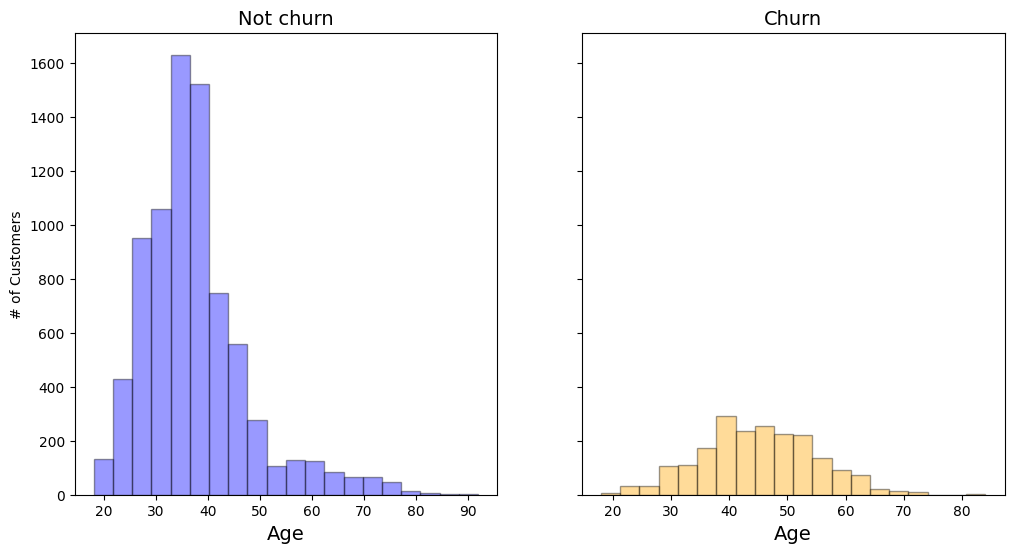

In [56]:
fig, (ax1, ax2) = plt.subplots (nrows=1, ncols=2, sharey=True, figsize=[12, 6])
ax = sns.distplot(df[df['Exited']==0]['Age'], 
                hist=True, kde=False, bins=20, color='blue', 
                hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4}, ax=ax1)
ax.set_ylabel('# of Customers')
ax1.set_xlabel('Age', size = 14)
ax1.set_title('Not churn', size = 14)

ax = sns.distplot(df[df['Exited']==1]['Age'], 
                  hist=True, kde=False, bins=20, color='orange', 
                  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4}, ax=ax2)
ax2.set_xlabel('Age', size = 14)
ax2.set_title('Churn', size = 14)

- People older than 50 are much more likely to churn than people under 50. 
- People who do not churn, their age mainly distributed between 25 to 45, and people over age 55 are only a very small proportion of population, whereas for people who churn, the proportion of those older people are much higher. 
- This helps to explain why we see many outliers in the boxplot.
- Also, this is consistent to what we found from the correlation plot that 'Age' and 'Exited' are positively related.

- The number of people who do not churn is much more than the number of people who churn.
- This shows that dataset is imbalanced, which could potentially lead to an increasing number of false negatives as the models would learn much more from negatives (not churn) data.